In [350]:
import pandas as pd
import geopandas as gpd
import altair as alt

In [351]:
#all_sheets = pd.read_excel('https://docs.google.com/spreadsheets/d/1yZv9w9zRKwrGTaR-YzmAqMefw4wMlaXocejdxZaTs6w/export?format=xlsx', sheet_name=None)

In [352]:
all_sheets = pd.read_excel('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/export?format=xlsx', sheet_name=None)

In [353]:
print(all_sheets.keys())
#df = all_sheets['Jan31_2pm']
#df.head()

odict_keys(['Feb03_940pm', 'Feb03_1230pm', 'Feb02_9PM', 'Feb02_745pm', 'Feb02_5am', 'Feb01_11pm', 'Feb01_6pm', 'Feb01_10am', 'Jan31_7pm', 'Jan31_2pm', 'Jan30_930pm', 'Jan30_11am', 'Jan29_9pm', 'Jan29_230pm', 'Jan29_130pm', 'Jan28_11pm', 'Jan28_6pm', 'Jan28_1pm', 'Jan27_830pm', 'Jan27_7pm', 'Jan27_9am', 'Jan26_11pm', 'Jan26_11am', 'Jan25_10pm', 'Jan25_12pm', 'Jan25_12am', 'Jan24_12pm', 'Jan24_12am', 'Jan23_12pm', 'Jan22_12pm', 'Jan22_12am'])


In [354]:
selection_sheets = list(all_sheets.keys())#[::3]
#print(selection_sheets)

In [355]:
#selection_sheets = ['Jan31_7pm', 'Jan30_930pm', 'Jan29_230pm', 'Jan28_11pm', 'Jan27_7pm', 'Jan26_11pm', 'Jan25_10pm', 'Jan24_12pm', 'Jan23_12pm', 'Jan22_12pm']

In [356]:
df_all = pd.DataFrame()
for sheet in selection_sheets:
    df = all_sheets[sheet]
    df.rename(columns={'Last Update':'Date'}, inplace=True)
    df.rename(columns={'Date last updated':'Date'}, inplace=True) 
    df.rename(columns={'Last Update (UTC)':'Date'}, inplace=True)     
    df_all = pd.concat((df_all, df), axis=0, sort=False)

In [357]:
df_all.columns

Index(['Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Unnamed: 6', 'Unnamed: 7',
       'Quick note: Starting from this tab, our map is updating (almost) in real time (China data - at least once per hour; non China data - several times per day). This table is planning to be updated twice a day. The discrepancy between the map and this sheet is expected. Sorry for any confusion and inconvenience.',
       'Suspected', 'Demised', 'Country'],
      dtype='object')

In [358]:
# df_all.replace(
#     to_replace=['Ningxia', 'Inner Mongolia', 'Xinjiang', 'Tibet'], 
#     value=['Nei Mongol', 'Ningxia Hui','Xinjiang Uygur', 'Xizang'],
#     inplace=True
# )
#df_all.fillna(0, inplace=True)

In [359]:
df_all.head()
#len(df_all.Date.unique())

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Unnamed: 6,Unnamed: 7,"Quick note: Starting from this tab, our map is updating (almost) in real time (China data - at least once per hour; non China data - several times per day). This table is planning to be updated twice a day. The discrepancy between the map and this sheet is expected. Sorry for any confusion and inconvenience.",Suspected,Demised,Country
0,Hubei,Mainland China,2020-02-04 01:23:00,13522.0,414.0,396.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Zhejiang,Mainland China,2020-02-04 01:43:00,829.0,0.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Guangdong,Mainland China,2020-02-04 01:43:00,797.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Henan,Mainland China,2020-02-04 01:23:00,675.0,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Hunan,Mainland China,2020-02-04 01:43:00,593.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
df_all = df_all[['Province/State', 'Date', 'Confirmed', 'Deaths', 'Recovered']]

In [361]:
provs = ['Hubei',
 'Zhejiang',
 'Guangdong',
 'Henan',
 'Hunan',
 'Anhui',
 'Jiangxi',
 'Chongqing',
 'Jiangsu',
 'Sichuan',
 'Shandong',
 'Beijing',
 'Shanghai',
 'Fujian',
 'Shaanxi',
 'Guangxi',
 'Hebei',
 'Heilongjiang',
 'Yunnan',
 'Liaoning',
 'Hainan',
 'Shanxi',
 'Tianjin',
 'Gansu',
 'Guizhou',
 'Nei Mongol',
 'Ningxia Hui',
 'Jilin',
 'Xinjiang Uygur',
 'Hong Kong',
 'Taiwan',
 'Qinghai',
 'Macau',
 'Xizang']

In [362]:
#df_all.dropna(inplace=True)

In [363]:
df_all.head()

,Province/State,Date,Confirmed,Deaths,Recovered
0,Hubei,2020-02-04 01:23:00,13522.0,414.0,396.0
1,Zhejiang,2020-02-04 01:43:00,829.0,0.0,48.0
2,Guangdong,2020-02-04 01:43:00,797.0,0.0,21.0
3,Henan,2020-02-04 01:23:00,675.0,2.0,20.0
4,Hunan,2020-02-04 01:43:00,593.0,0.0,22.0


In [364]:
df_all.Date = pd.to_datetime(df_all.Date, errors='coerce')
#df_all.dropna(subset=['Date'])

In [365]:
df_all.shape

(1661, 5)

In [366]:
df_all.sort_values(['Province/State', 'Date'], inplace=True)
#df_all.groupby('Province/State').mask(df_all.notnull().cummax(), df_all.fillna(method='ffill'))

In [367]:
df_all = df_all.groupby('Province/State').resample('1d', on='Date', ).max()
# 'Province/State','Date', 
df_all = df_all[['Confirmed', 'Deaths', 'Recovered']].reset_index()
#df_all = df_all.groupby('Province/State').fillna(method='ffill')

#df_all = df_all.mask(df_all.notnull().cummax(), df_all.fillna(method='ffill'))
#df_all.fillna(0, inplace=True)

In [368]:
list_of_prov = []
for prov in df_all['Province/State'].unique():
    df_prov = df_all[df_all['Province/State'] == prov]
    df_prov = df_prov.fillna(method='ffill')
    list_of_prov.append(df_prov)
df_all = pd.concat(list_of_prov)
        

In [369]:
df_all = pd.concat(list_of_prov)

In [370]:
#df_all = df_all[df_all["Province/State"].isin(provs)]

In [371]:
hubei = df_all[df_all['Province/State'] == 'Hubei']
hubei = hubei.sort_values('Date', ascending=True)

In [372]:
hubei.Date = pd.to_datetime(hubei.Date, errors='coerce')
x = pd.to_numeric(hubei.Date).values
y = hubei.Confirmed.values.astype(int)

In [373]:
x

array([1579564800000000000, 1579651200000000000, 1579737600000000000,
       1579824000000000000, 1579910400000000000, 1579996800000000000,
       1580083200000000000, 1580169600000000000, 1580256000000000000,
       1580342400000000000, 1580428800000000000, 1580515200000000000,
       1580601600000000000, 1580688000000000000, 1580774400000000000])

In [374]:
delta_x = (x[1] - x[0]) 
delta_y = y.min()

In [375]:
delta_x

86400000000000

In [376]:
xn = (x / delta_x)
offset = xn[0]-1
xn = xn - offset
yn = y / delta_y

In [377]:
yn

array([ 1.        ,  1.64444444,  1.64444444,  2.03333333,  3.8962963 ,
        5.27037037, 10.05185185, 13.16296296, 16.98518519, 21.5037037 ,
       26.49259259, 41.3962963 , 41.3962963 , 41.3962963 , 50.08148148])

In [378]:
xn

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.])

[2.79388523 0.19854093]


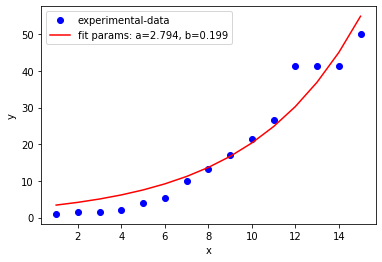

In [379]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline
 
#Fitting function
def func(x, a, b):
    return a*np.exp(b*x)
    #return a*x+b

# Experimental x and y data points    
xData = xn #  np.array([1, 2, 3, 4, 5])
yData = yn #  np.array([1, 9, 50, 300, 1500])
 
#Plot experimental data points
plt.plot(xData, yData, 'bo', label='experimental-data')
 
# Initial guess for the parameters
initialGuess = [1, 1]    
 
#Perform the curve-fit
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#x values for the fitted function
xFit = xn#np.arange(xData.min(), xData.max(), 0.01)
 
#Plot the fitted function
plt.plot(xFit, func(xFit, *popt), 'r', label='fit params: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [380]:
yFit = func(xFit, *popt)

In [381]:
xDT_fit = (xFit + offset) * delta_x

In [382]:
yDT_fit = yFit * delta_y

In [383]:
df = pd.DataFrame(data=np.array([xDT_fit, yDT_fit]).T, columns=['fit_date', 'fit_confirmed'])
df.fit_date = pd.to_datetime(df.fit_date)
df.loc[:,'Legend'] = 'Regression fit Hubei'
df.head()

,fit_date,fit_confirmed,Legend
0,2020-01-21,920.020606,Regression fit Hubei
1,2020-01-22,1122.077319,Regression fit Hubei
2,2020-01-23,1368.510119,Regression fit Hubei
3,2020-01-24,1669.064969,Regression fit Hubei
4,2020-01-25,2035.628259,Regression fit Hubei


In [384]:
fit_hubei = alt.Chart(df).mark_line().encode(
    x='yearmonthdatehours(fit_date):T', 
    y='fit_confirmed:Q', 
    color=alt.Color('Legend', scale=alt.Scale(range=['red']))
)
fit_hubei

alt.Chart(...)

In [385]:
hubei
hubei.loc[:,'Legend'] = 'Confirmed Cases Hubei'

In [386]:
chart = alt.Chart(hubei, width=250, height=250).mark_line(point=True).encode(
    x=alt.X('Date:T', title=None),
    y=alt.Y('Confirmed:Q', scale=alt.Scale(type='log'), title='Confirmed'),
    order='Date:T',
    color=alt.Color('Legend', scale=alt.Scale(range=['#138FDA','red']))
)

r = (chart + fit_hubei).properties(title='Log-scale)')

In [387]:
chart = alt.Chart(hubei, width=250, height=250).mark_line(point=True).encode(
    x=alt.X('Date:T', title=None),
    y=alt.Y('Confirmed:Q', scale=alt.Scale(type='linear'), title='Confirmed'),
    order='Date:T',
    color=alt.Color('Legend', scale=alt.Scale(range=['#138FDA','red']))
)

l = (chart + fit_hubei).properties(title='Linear-scale)')

In [388]:
l

alt.LayerChart(...)

In [389]:
(l | r).properties(title='Hubei Confirmed cases')

alt.HConcatChart(...)

In [390]:
facet_order = df_all.sort_values(by='Confirmed', ascending=False)['Province/State'].astype(str).unique().tolist()

In [391]:
df_all.loc[:, 'Legend'] = 'Province'

In [392]:
df_all.head()

,Province/State,Date,Confirmed,Deaths,Recovered,Legend
0,Anhui,2020-01-21,NaN,NaN,NaN,Province
1,Anhui,2020-01-22,1.0,NaN,NaN,Province
2,Anhui,2020-01-23,9.0,NaN,NaN,Province
3,Anhui,2020-01-24,15.0,NaN,NaN,Province
4,Anhui,2020-01-25,60.0,NaN,NaN,Province


In [393]:
#df_all[df_all['Province/State']==pr]

In [394]:
charts = []
for pr in facet_order:
    df_pr = df_all[df_all['Province/State']==pr]
    line_pr = alt.Chart(df_pr, width=125, height=100).mark_line(point=True).encode(
        x=alt.X('yearmonthdate(Date):T', title=None),
        y=alt.Y('Confirmed:Q', scale=alt.Scale(type='log', domain=[1,12000]), title='Confirmed'),
        order='Date:T',
        color=alt.Color('Legend', scale=alt.Scale(range=['#138FDA','red'])),
        tooltip=[alt.Tooltip('yearmonthdate(Date):T', title='Date'), alt.Tooltip('Confirmed:Q', title='Confirmed'), 'Province/State:N']
    ).properties(title=pr)
    comb_pr = (line_pr + fit_hubei)
    charts.append(comb_pr)

In [395]:
# make a single row
def make_hcc(row_of_charts):
    hconcat = [chart for chart in row_of_charts]
    hcc = alt.HConcatChart(hconcat=hconcat)
    return hcc

# take an array of charts and produce a facet grid
def facet_wrap(charts, charts_per_row):
    rows_of_charts = [
        charts[i:i+charts_per_row] 
        for i in range(0, len(charts), charts_per_row)]        
    vconcat = [make_hcc(r) for r in rows_of_charts]    
    vcc = alt.VConcatChart(vconcat=vconcat)\
      .configure_axisX(grid=True)\
      .configure_axisY(grid=True)
    return vcc

# assemble the facet grid
compound_chart = facet_wrap(charts, charts_per_row=4)
combined_provinces = compound_chart#.properties(title=['Confirmed cased in China', 'Provinces sorted by no. confirmed cases'])

In [396]:
combined_provinces

alt.VConcatChart(...)

In [397]:
import hkvportal

In [398]:
dp = hkvportal.Service('https://tsws.hkvservices.nl/mangrove.ws/', '236ebLIeCDdnKbfGe956IvZetIv1')

Dataservice is recognized. https://tsws.hkvservices.nl/mangrove.ws/entry.asmx?WSDL will be used as portal


In [399]:
#dp.create_database(database='2019-nCoV')

In [400]:
# dp.update_entry(
#     database='2019-nCoV',
#     key='regresion_linear_provinces',
#     data=combined_provinces.to_html(),
#     description='small multiples provices'
# )

In [401]:
dp.update_entry(
    database='2019-nCoV',
    key='regresion_log_provinces',
    data=combined_provinces.to_html(),
    description='small multiples provices'
)

entry available at:
https://tsws.hkvservices.nl/mangrove.ws/data.ashx?function=dataportal.db.getdata&parameters={database:'2019-nCoV',key:'regresion_log_provinces'}&contentType=SET_BY_USER


In [402]:
symbols = alt.Chart(df_all.replace(pd.np.nan, None)).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('yearmonthdate(Date):T', axis=alt.Axis(labelAngle=0), title=None),
    alt.Y('Province/State:N', sort=facet_order),
    alt.Size(field='Confirmed', type='quantitative', aggregate='max',
        scale=alt.Scale(range=[10,4000],type='linear'),
        legend=alt.Legend(title='Confirmed Cases')
    ),
    alt.Color('Province/State:N', legend=None, scale=alt.Scale(scheme='tableau20')),
    tooltip=[alt.Tooltip('yearmonthdate(Date):T', title='Date'), alt.Tooltip('max(Confirmed):Q', title='Confirmed'),'Province/State:N']
).properties(
    width=500,
    height=700
)

In [403]:
symbols

alt.Chart(...)

In [404]:
dp.update_entry(
    database='2019-nCoV',
    key='symbol_plot',
    data=symbols.to_html(),
    description='comb_symbol_map'
)

entry available at:
https://tsws.hkvservices.nl/mangrove.ws/data.ashx?function=dataportal.db.getdata&parameters={database:'2019-nCoV',key:'symbol_plot'}&contentType=SET_BY_USER


In [73]:
with open('comb.html', 'r') as f:
    fil = f.read()

In [405]:
#fil

In [75]:
dp.update_entry(
    database='2019-nCoV',
    key='combination_page',
    data=fil,
    description='comb_line_map'
)

entry available at:
https://tsws.hkvservices.nl/mangrove.ws/data.ashx?function=dataportal.db.getdata&parameters={database:'2019-nCoV',key:'combination_page'}&contentType=SET_BY_USER
